1.8724125722809681 32.40564623178784
Die Zeit wird berechnet und ergibt sich aus der Summe der System und Benutzer-CPU-Zeit...
0.0029993057250976562
Die Erzeugung von 1000 Zufallszahlen zwischen 0 und  1000  + Sortierung dauert:  0.0
Die Erzeugung von 10000 Zufallszahlen zwischen 0 und  10000  + Sortierung dauert:  0.008005142211914062
Die Erzeugung von 100000 Zufallszahlen zwischen 0 und  100000  + Sortierung dauert:  0.09800076484680176


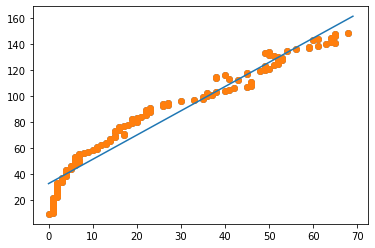

In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import random

# Funktionswerte auf Basis der berechneten m und b Werte berechnen
def predict(x):
    return m*x + b

def calculate_time(numbers):
    start = time.time()    
    X = random_numbers = random.sample(range(numbers), numbers)
    X.sort()
    end = time.time()
    print("Die Erzeugung von", numbers, "Zufallszahlen zwischen 0 und ", numbers, " + Sortierung dauert: ", (end - start))
    

# Globalstrahlungsdaten einlesen (Potsdam Januar 10.01.2021 07:00 UTC - 9:00 UTC)
global_strahlung_pdm_data = pd.read_csv('globalstrahlung.csv')

# Daten konvertieren
X = global_strahlung_pdm_data['G'].astype('int')
Y = global_strahlung_pdm_data['time'].astype('int')

# Testausgabe
plt.scatter(X,Y);

# m zu 'Fuß' berechnen
m = (len(X) * np.sum(X*Y) - np.sum(X) * np.sum(Y)) / (len(X)*np.sum(X*X) - np.sum(X) ** 2)


# b zu 'Fuß' berechnen
b = (np.sum(Y) - m *np.sum(X)) / len(X)

# Ausgabe von m und b
print(m,b)

#Start der Zeitmessung
start = time.time()

# Regressionsgerade mit berechneten m und b darstellen
vec = np.arange(70)
plt.scatter(X,Y)
plt.plot(vec,predict(vec))

#Ende der Zeitmessung
end = time.time()

#Summe aus System und Benutzer-CPU-Zeit 
print("Die Zeit wird berechnet und ergibt sich aus der Summe der System und Benutzer-CPU-Zeit...")
print(end - start)

calculate_time(1000)
calculate_time(10000)
calculate_time(100000)

In [2]:
print(global_strahlung_pdm_data)

         time   G   avgG  stdG   D   avgD  stdD
0    07:09:00   0   0.45  0.50   0   0.45  0.50
1    07:10:00   1   0.55  0.50   1   0.55  0.50
2    07:11:00   1   0.64  0.48   1   0.64  0.48
3    07:12:00   1   0.73  0.45   1   0.73  0.45
4    07:13:00   1   0.82  0.39   1   0.82  0.39
..        ...  ..    ...   ...  ..    ...   ...
135  09:24:00  64  64.45  2.50  64  64.45  2.50
136  09:25:00  65  65.36  3.44  65  65.36  3.44
137  09:26:00  65  66.00  3.93  65  66.00  3.93
138  09:27:00  65  66.91  4.48  65  66.91  4.48
139  09:28:00  68  68.27  4.45  68  68.27  4.45

[140 rows x 7 columns]
